In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from google.colab import drive
from scipy import stats
from sklearn.base import TransformerMixin
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/trainingData.csv"

In [0]:
df = pd.read_csv(path)

In [5]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 40000
Total number of columns in dataset = 21


In [6]:
df.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
Id                       40000 non-null int64
city                     38136 non-null object
age                      40000 non-null int64
sex                      40000 non-null object
social_class             34745 non-null object
primary_business         39974 non-null object
secondary_business       34759 non-null object
annual_income            40000 non-null float64
monthly_expenses         39880 non-null float64
old_dependents           40000 non-null int64
young_dependents         40000 non-null int64
home_ownership           39621 non-null float64
type_of_house            39306 non-null object
occupants_count          40000 non-null int64
house_area               40000 non-null float64
sanitary_availability    39792 non-null float64
water_availabity         34747 non-null float64
loan_purpose             39974 non-null object
loan_tenure              40000 non-null int6

In [0]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=10),2) 

    return summary

In [9]:
result = resumetable(df)
result

Dataset Shape: (40000, 21)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,Id,int64,0,40000,1,2,3,4.60
1,city,object,1864,856,Dhanbad,Manjapra,Dhanbad,1.99
2,age,int64,0,62,22,21,24,1.53
3,sex,object,0,3,F,F,M,0.10
4,social_class,object,5255,519,Mochi,OBC,Nai,1.38
5,primary_business,object,26,441,Tailoring,Tailoring,Beauty salon,1.83
6,secondary_business,object,5241,5,Others,none,Others,0.33
7,annual_income,float64,0,359,36000,94000,48000,1.48
8,monthly_expenses,float64,120,260,5000,3600,4000,1.41
9,old_dependents,int64,0,4,0,1,0,0.08


In [10]:
#missing data observing in columns
total = df.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((df.isnull().sum(axis=0)/df.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(15)

,Total,Percent
social_class,5255,13.1375
water_availabity,5253,13.1325
secondary_business,5241,13.1025
city,1864,4.6600
type_of_house,694,1.7350
home_ownership,379,0.9475
sanitary_availability,208,0.5200
monthly_expenses,120,0.3000
loan_purpose,26,0.0650
primary_business,26,0.0650


In [0]:
# Since ID is a unique value in each row, its better to drop the column
columns = ['Id']
df.drop(columns, inplace=True, axis=1)

In [0]:
# Split df into x and Y
target_col = "loan_amount"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [13]:
X.shape

(40000, 19)

In [14]:
y.shape

(40000,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

# Imputing missing values

In [0]:
# Collect column names from X_train which have missing values
missing_data_cols = [col for col in X_train.columns if X_train[col].isnull().any()]

In [17]:
numerical_feature_columns = list(X_train._get_numeric_data().columns)
categorical_feature_columns = list(set(X_train.columns) - set(X_train._get_numeric_data().columns))
print ("Number of numeric columns = {}".format(len(numerical_feature_columns)))
print ("Number of categorical columns = {}".format(len(categorical_feature_columns)))

Number of numeric columns = 12
Number of categorical columns = 7


In [18]:
print(missing_data_cols)

['city', 'social_class', 'primary_business', 'secondary_business', 'monthly_expenses', 'home_ownership', 'type_of_house', 'sanitary_availability', 'water_availabity', 'loan_purpose']


In [19]:
X_train[missing_data_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26800 entries, 8451 to 15795
Data columns (total 10 columns):
city                     25559 non-null object
social_class             23299 non-null object
primary_business         26780 non-null object
secondary_business       23305 non-null object
monthly_expenses         26727 non-null float64
home_ownership           26551 non-null float64
type_of_house            26330 non-null object
sanitary_availability    26663 non-null float64
water_availabity         23300 non-null float64
loan_purpose             26780 non-null object
dtypes: float64(4), object(6)
memory usage: 2.2+ MB


In [0]:
class DataFrameImputer(TransformerMixin):
    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with median of column.

        """

    def fit(self, X, y=None):

        self.fill = pd.Series(
            [
                X[c].value_counts().index[0]
                if X[c].dtype == np.dtype("O")
                else X[c].median()
                for c in X
            ],
            index=X.columns,
        )

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [0]:
X_train = DataFrameImputer().fit_transform(X_train)

In [22]:
# Check if there is any column with missing value
[col for col in X_train.columns if X_train[col].isnull().any()]

[]

# Target Variable Distribution

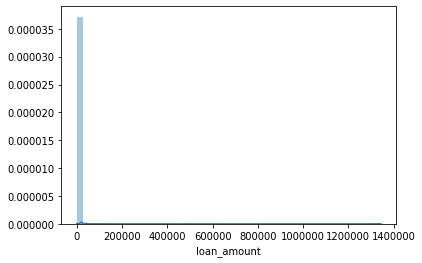

In [23]:
sns.distplot(y_train)

In [24]:
y_train.describe()

count    2.680000e+04
mean     8.413123e+03
std      1.361398e+04
min      2.000000e+02
25%      5.000000e+03
50%      8.000000e+03
75%      1.000000e+04
max      1.343000e+06
Name: loan_amount, dtype: float64

In [25]:
print("Skewness: %f" % y_train.skew())

Skewness: 63.118622


**The target variable is positively skewed with a mean value close to 8500, we will have to apply transformation to convert it to near normal distribution**

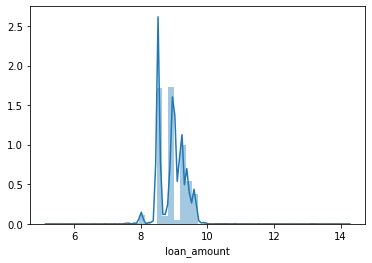

In [26]:
y_train = np.log(y_train)
sns.distplot(y_train)

In [27]:
print("Skewness: %f" % y_train.skew())

Skewness: 0.484616


**We have successfully brought down the skew value from 63 to 0.48 so the distribution is near normal distribution, lets apply the log transformation again to check if we reach even closer to a normal distribution**

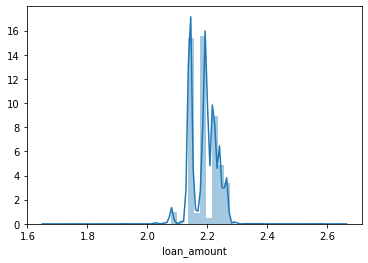

In [28]:
y_train = np.log(y_train)
sns.distplot(y_train)

In [29]:
print("Skewness: %f" % y_train.skew())

Skewness: 0.080278


**We have successfully reached a near normal distribution by applying log transformation twice**

# Converting cateogrical columns to Numeric

In [30]:
X_train[categorical_feature_columns].head()

,city,primary_business,social_class,type_of_house,secondary_business,sex,loan_purpose
8451,Pusad,Fancy Store,OBC,T1,none,F,Retail Store
28293,Imphal,School,OBC,T2,none,F,Education Loan
9948,Nuapada,Vegetable vendor,OBC,T1,none,F,Agro Based Businesses
32270,Balasore,Poultry farm,General,T2,Others,F,Meat Businesses
39564,Imphal,Weaver,OBC,T2,none,F,Apparels


In [0]:
summary = pd.DataFrame(index = X_train[categorical_feature_columns].columns)
summary["unique"] = X_train[categorical_feature_columns].nunique().values

In [32]:
summary

,unique
city,749
primary_business,387
social_class,428
type_of_house,3
secondary_business,5
sex,3
loan_purpose,36


**secondary_business, type_of_house, sex are nominal variables with low cardinality so we can use one-hot encoding to convert from categorical to numeric**

In [33]:
X_train["sex"].value_counts(normalize=True)

F     0.939627
M     0.060149
TG    0.000224
Name: sex, dtype: float64

In [34]:
X_train["secondary_business"].value_counts(normalize=True)

none                   0.815634
Others                 0.065187
Daily wage labourer    0.062948
Agriculture            0.051978
Livestock rearing      0.004254
Name: secondary_business, dtype: float64

In [35]:
X_train["type_of_house"].value_counts(normalize=True)

T2    0.457985
T1    0.378731
R     0.163284
Name: type_of_house, dtype: float64

In [0]:
X_train = pd.get_dummies(X_train, 
                         columns=["sex", "type_of_house", "secondary_business"], 
                         prefix=["gender", "house_type", "sec_business"], 
                         drop_first=True)

In [37]:
X_train["loan_purpose"].value_counts(normalize=True)

Apparels                           0.178545
Agro Based Businesses              0.119552
Animal husbandry                   0.107985
Meat Businesses                    0.107313
Handicrafts                        0.104925
Farming/ Agriculture               0.083284
Education Loan                     0.052090
Retail Store                       0.050299
Eateries                           0.045373
Business Services - II             0.021493
Tobacco Related Activities         0.021082
Construction Related Activities    0.015858
Retail Sale                        0.014888
Artifical Jewellry Selling         0.014216
Carpentery work                    0.007724
Business Services - I              0.007351
Food Items                         0.007164
Flower Business                    0.005896
Transportation Services            0.005746
Beauty Salon                       0.005112
Repair Services                    0.004515
Laundry Services                   0.004067
Sanitation                      

**Since the remaining categorical columns are highly cardinal in nature, I make use of hashing & frequency encoding to encode the variables**

In [0]:
high_card_feats = ["loan_purpose", "primary_business", "city", "social_class"]

In [0]:
def frequency_encoding(df, inp_column):
    fe = df.groupby(inp_column).size()/len(df)
    return df[inp_column].map(fe)

In [0]:
for col in high_card_feats:
    X_train[col] = frequency_encoding(X_train, col)

In [0]:
Y_train = pd.DataFrame(y_train, columns=[target_col])
train_df =  pd.concat([X_train, Y_train], axis=1, sort=False)

In [0]:
numcorr = train_df.corr()
Num = numcorr[target_col].sort_values(ascending=False).head(10).to_frame()
cm = sns.light_palette("cyan", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)

In [43]:
s

,loan_amount
loan_amount,1
annual_income,0.350691
city,0.188384
sanitary_availability,0.180462
young_dependents,0.136433
loan_tenure,0.130684
loan_installments,0.123016
water_availabity,0.118796
house_area,0.0728074
sec_business_none,0.0585492


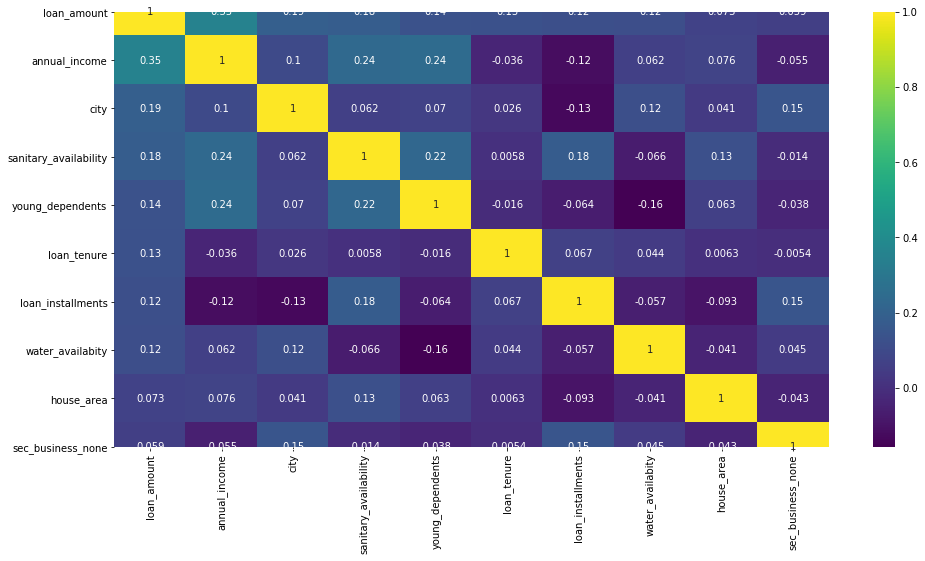

In [44]:
k = 10 #number of variables for heatmap
cols = train_df.corr().nlargest(k, target_col)[target_col].index
cm = train_df[cols].corr()
plt.figure(figsize=(16,8))
sns.heatmap(cm, annot=True, cmap = 'viridis')

# Removing Multicolinearity using VIF

In [0]:
col_vif_dict = {}
for cols in X_train.columns:
    y = X_train.loc[:, X_train.columns == cols]
    x = X_train.loc[:, X_train.columns != cols]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    col_vif_dict[cols] = vif

In [46]:
col_vif_dict

{'age': 1.0,
 'annual_income': 3.38,
 'city': 1.99,
 'gender_M': 0.05,
 'gender_TG': 1.0,
 'home_ownership': 27.94,
 'house_area': 1.23,
 'house_type_T1': 0.06,
 'house_type_T2': 0.08,
 'loan_installments': 3.66,
 'loan_purpose': 7.69,
 'loan_tenure': 41.64,
 'monthly_expenses': 1.81,
 'occupants_count': 1.0,
 'old_dependents': 1.08,
 'primary_business': 3.63,
 'sanitary_availability': 3.99,
 'sec_business_Daily wage labourer': 0.2,
 'sec_business_Livestock rearing': 1.08,
 'sec_business_Others': 0.27,
 'sec_business_none': 0.07,
 'social_class': 2.5,
 'water_availabity': 11.39,
 'young_dependents': 2.5}

A rule of thumb commonly used in practice is if a VIF is > 10, you have high multicollinearity.

In [0]:
multicolinear_features = [key for key,value in col_vif_dict.items() if value > 10]

In [48]:
multicolinear_features

['home_ownership', 'water_availabity', 'loan_tenure']

In [0]:
X_train.drop(multicolinear_features, inplace=True, axis=1)

In [0]:
# Normalizing the Data
X_train = (X_train - X_train.mean())/X_train.std()

In [0]:
def gradient_descent(X, y, alpha, max_iterations, is_intercept, tolerance):
    i_out = 0
    if is_intercept == 1:
        ones = np.ones([X.shape[0], 1])
        X = np.concatenate((ones, X), axis=1)
    cost_history = np.zeros(max_iterations)
    num_examples, num_features = np.shape(X)
    theta = np.ones(num_features)
    x_transposed = X.transpose()
    for i in range(max_iterations):
        # difference between our output and actual values
        diffs = np.dot(X, theta) - y
        # sum of the squares
        cost_history[i] = np.sum(diffs ** 2) / (2 * num_examples)
        # calculate averge gradient for every example
        gradient = np.dot(x_transposed, diffs) / num_examples
        # update the coeffcients
        theta -= alpha * gradient
        if cost_history[i] < tolerance:
            print ("Final Cost {} and iteration = {} ".format(cost_history[i], i))
            return cost_history, theta, i
    print ("Final Cost {}".format(cost_history[i]))
    return cost_history, theta, i_out

In [0]:
num_iterations = 50000
alpha = 0.001
is_intercept = 1
tolerance = 0.1

In [53]:
cost, theta, total_iterations = gradient_descent(X_train.values, y_train.values, alpha, num_iterations , is_intercept, tolerance)

Final Cost 0.09995875902100126 and iteration = 4496 


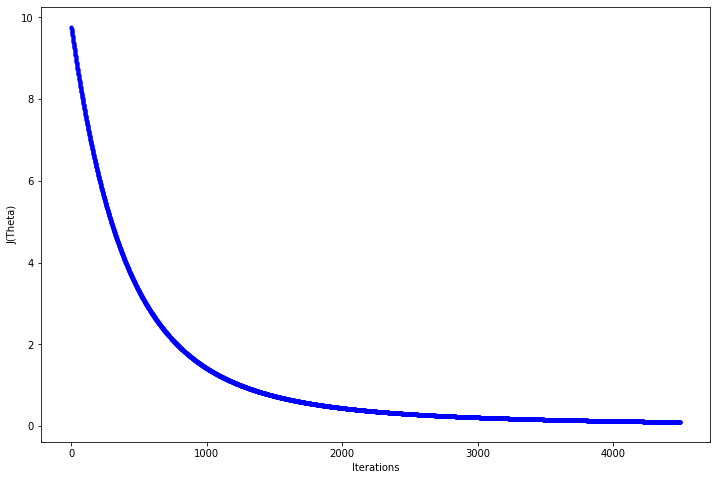

In [54]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_ = ax.plot(range(total_iterations),cost[:total_iterations],'b.')

In [0]:
def predict(x, theta):
		return np.dot(x, theta)

In [56]:
ones = np.ones([X_train.shape[0], 1])
X = np.concatenate((ones, X_train), axis=1)
y_train_predict = predict(X, theta)
rmse_train = mean_squared_error(y_train_predict, y_train)
print('RMSE for training: {}'.format(round(rmse_train,4)))

RMSE for training: 0.1998


In [0]:
def generate_regression_values(X, y, theta, col_names):
    cols = ["constant"]
    predictions = np.dot(X, theta)
    MSE = (sum((y - predictions) ** 2)) / (X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X.T, X)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = theta / sd_b
    p_values = [2 * (1 - stats.t.cdf(np.abs(i), (X.shape[0] - 1))) for i in ts_b]
    cols.extend(col_names)
    sd_b = np.round(sd_b, 3)
    ts_b = np.round(ts_b, 3)
    p_values = np.round(p_values, 3)
    theta = np.round(theta, 4)
    myDF3 = pd.DataFrame()
    myDF3["Features"], myDF3["Coefficients"], myDF3["Standard Errors"], myDF3[
        "t values"
    ], myDF3["Probabilites"] = [cols, theta, sd_b, ts_b, p_values]
    return myDF3

In [58]:
generate_regression_values(X, y_train, theta, list(X_train.columns))

,Features,Coefficients,Standard Errors,t values,Probabilites
0,constant,2.1759,0.003,796.505,0.000
1,city,-0.0099,0.003,-3.354,0.001
2,age,0.0112,0.003,4.103,0.000
3,social_class,0.0991,0.003,32.312,0.000
4,primary_business,0.0211,0.004,5.849,0.000
5,annual_income,0.0848,0.003,28.061,0.000
6,monthly_expenses,0.0050,0.003,1.773,0.076
7,old_dependents,0.0164,0.003,5.909,0.000
8,young_dependents,0.0442,0.003,15.014,0.000
9,occupants_count,0.0191,0.003,6.972,0.000


In [0]:
y_test = np.log(np.log(y_test))
X_test = DataFrameImputer().fit_transform(X_test)
X_test = pd.get_dummies(X_test, 
                         columns=["sex", "type_of_house", "secondary_business"], 
                         prefix=["gender", "house_type", "sec_business"], 
                         drop_first=True)
for col in high_card_feats:
    X_test[col] = frequency_encoding(X_test, col)
X_test.drop(multicolinear_features, inplace=True, axis=1)
X_test = (X_test - X_test.mean())/X_test.std()

In [60]:
ones_test = np.ones([X_test.shape[0], 1])
X_t = np.concatenate((ones_test, X_test), axis=1)
y_test_predict = predict(X_t, theta)
rmse_test = mean_squared_error(y_test_predict, y_test)
print('RMSE for test: {}'.format(round(rmse_test,4)))

RMSE for test: 0.2077
